# Improving Our News Articles Summarizer

## Introduction
The purpose of this lesson is to enhance our previous implementation of a News Article Summarizer. Our objective is to make our tool even more effective at distilling key information from lengthy news articles and presenting that information in an easy-to-digest, bulleted list format. This enhancement will enable users to quickly comprehend the main points of an article in a clear, organized way, thus saving valuable time and enhancing the reading experience.

To achieve this, we will modify our existing summarizer to instruct the underlying language model to generate summaries as bulleted lists. This task involves a few changes to the way we present our prompt to the model, which we will guide you through in the workflow below.

## Workflow for Building a News Articles Summarizer with Bulleted Lists

This is what we are going to doin this project.

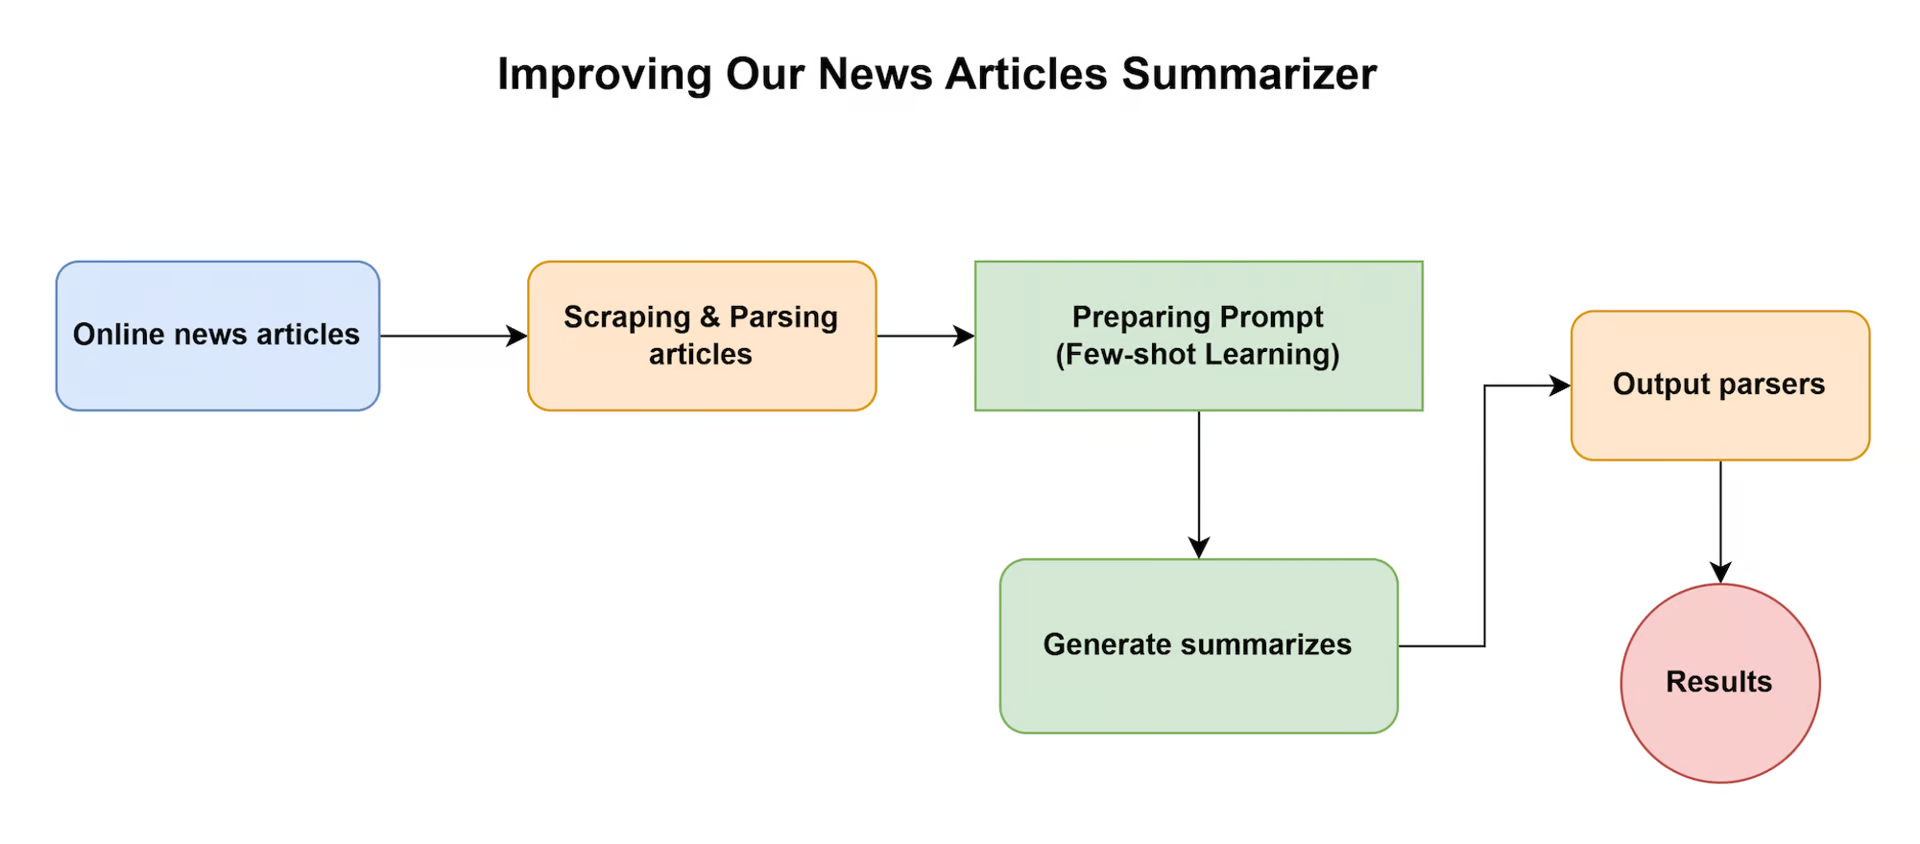

We set up the environment and retrieved the news article.

1. Install required libraries: The first step is to ensure that the necessary libraries, namely requests, newspaper3k, and LangChain, are installed.
2. Scrape articles: We will use the requests library to scrape the content of the target news articles from their respective URLs.
3. Extract titles and text: The newspaper library will be used to parse the scraped HTML, extracting the titles and text of the articles.
4. Preprocess the text: The extracted texts need to be cleaned and preprocessed to make them suitable for input to LLM.

The rest of the lesson will explore new possibilities to enhance the application’s performance further.

5. Use Few-Shot Learning Technique: We use the few-shot learning technique in this step. This template will provide a few examples of the language model to guide it in generating the summaries in the desired format - a bulleted list.
6. Generate summaries: With the modified prompt, we utilize the model to generate concise summaries of the extracted articles' text in the desired format.
7. Use the Output Parsers: We employ the Output Parsers to interpret the output from the language model, ensuring it aligns with our desired structure and format.
8. Output the results: Finally, we present the bulleted summaries along with the original titles, enabling users to quickly grasp the main points of each article in a structured manner.

We picked the URL of a news article to generate a summary. The following code fetches articles from a list of URLs using the requests library with a custom User-Agent header. It then extracts the title and text of each article using the newspaper library.

In [1]:
import requests
from newspaper import Article

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

article_url = "https://www.artificialintelligence-news.com/2022/01/25/meta-claims-new-ai-supercomputer-will-set-records/"

session = requests.Session()

try:
  response = session.get(article_url, headers=headers, timeout=10)
  
  if response.status_code == 200:
      article = Article(article_url)
      article.download()
      article.parse()
      
      print(f"Title: {article.title}")
      print(f"Text: {article.text}")
  else:
      print(f"Failed to fetch article at {article_url}")
except Exception as e:
    print(f"Error occurred while fetching article at {article_url}: {e}")

Title: Meta claims its new AI supercomputer will set records
Text: Ryan Daws is a senior editor at TechForge Media with over a decade of experience in crafting compelling narratives and making complex topics accessible. His articles and interviews with industry leaders have earned him recognition as a key influencer by organisations like Onalytica. Under his leadership, publications have been praised by analyst firms such as Forrester for their excellence and performance. Connect with him on X (@gadget_ry) or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing (NLP) and computer vision models.

RSC is set to be fully built in mid-2022. Meta says that it will be the fastest in the world once complete and 

The sample code.

## Few Shot Prompting
We saw in the previous lessons how to use FewShotPromptTemplate; let's now see another way of adding examples to a prompt that is slightly different but achieves similar results. In this experiment, we include several examples that guide the model's summarization process to generate bullet lists.  As a result, the model is expected to generate a bulleted list summarizing the given article.

In [2]:
from langchain.schema import (
    HumanMessage
)

# we get the article data from the scraping part
article_title = article.title
article_text = article.text

# prepare template for prompt
template = """
As an advanced AI, you've been tasked to summarize online articles into bulleted points. Here are a few examples of how you've done this in the past:

Example 1:
Original Article: 'The Effects of Climate Change
Summary:
- Climate change is causing a rise in global temperatures.
- This leads to melting ice caps and rising sea levels.
- Resulting in more frequent and severe weather conditions.

Example 2:
Original Article: 'The Evolution of Artificial Intelligence
Summary:
- Artificial Intelligence (AI) has developed significantly over the past decade.
- AI is now used in multiple fields such as healthcare, finance, and transportation.
- The future of AI is promising but requires careful regulation.

Now, here's the article you need to summarize:

==================
Title: {article_title}

{article_text}
==================

Please provide a summarized version of the article in a bulleted list format.
"""

# Format the Prompt
prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

These examples provide the model with a better understanding of how we want it to respond.  Here we have a few important components:

**Article data:** The title and text of the article are obtained, which will be used as inputs to the model.

**Template preparation:** A template is prepared for the prompt. This template includes a few-shot learning style, where the model is provided with examples of how it has previously converted articles into a bulleted list format. The template also includes placeholders for the actual article title and text that will be summarized.  Then, the placeholders in the template ({article_title} and {article_text}) are replaced with the actual title and text of the article using the .format() method. 

The next step is to use ChatOpenAI class to load the GPT-4 model for generating the summary. Then, the formatted prompt is passed to the language model as the input/prompt. The ChatOpenAI class's chat instance takes a HumanMessage list as an input argument.

In [3]:
from langchain.chat_models import ChatOpenAI

# load the model
chat = ChatOpenAI(model_name="gpt-4", temperature=0.0)

# generate summary
summary = chat(messages)
print(summary.content)

c:\Users\nate.lo\anaconda3\envs\Python39\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
c:\Users\nate.lo\anaconda3\envs\Python39\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


- Meta (formerly Facebook) has announced an AI supercomputer called the AI Research SuperCluster (RSC).
- The supercomputer is not yet fully complete but is already being used for training large natural language processing and computer vision models.
- RSC is expected to be fully built by mid-2022 and is projected to be the world's fastest supercomputer.
- The aim for RSC is to be capable of training models with trillions of parameters.
- Meta hopes that RSC will help build new AI systems for real-time voice translations and other applications, paving the way for the next major computing platform — the metaverse.
- In terms of production, RSC is expected to be 20x faster than Meta’s current V100-based clusters and 3x faster at training large-scale NLP workflows.
- A model with tens of billions of parameters can finish training in three weeks with RSC, compared to nine weeks previously.
- RSC was designed with security and privacy controls to allow Meta to use real-world examples from i

In [5]:
print(summary)

content="- Meta (formerly Facebook) has announced an AI supercomputer called the AI Research SuperCluster (RSC).\n- The supercomputer is not yet fully complete but is already being used for training large natural language processing and computer vision models.\n- RSC is expected to be fully built by mid-2022 and is projected to be the world's fastest supercomputer.\n- The aim for RSC is to be capable of training models with trillions of parameters.\n- Meta hopes that RSC will help build new AI systems for real-time voice translations and other applications, paving the way for the next major computing platform — the metaverse.\n- In terms of production, RSC is expected to be 20x faster than Meta’s current V100-based clusters and 3x faster at training large-scale NLP workflows.\n- A model with tens of billions of parameters can finish training in three weeks with RSC, compared to nine weeks previously.\n- RSC was designed with security and privacy controls to allow Meta to use real-world

The sample code.

The key takeaway here is the use of a few-shot learning style in the prompt. This provides the model with examples of how it should perform the task, which guides it to generate a bulleted list summarizing the article. By modifying the prompt and the examples, you can adjust the model's output to meet various requirements and ensure the model follows a specified format, tone, style, etc.

## Output Parsers
Now, let’s improve the previous section by using Output Parsers. The Pydantic output parser in LangChain offers a flexible way to shape the outputs from language models according to pre-defined schemas.  When used alongside prompt templates, it enables more structured interactions with language models, making it easier to extract and work with the information provided by the model.

The prompt template includes the format instructions from our parser, which guide the language model to produce the output in the desired structured format. The idea is to demonstrate how you could use PydanticOutputParser class to receive the output as a type List that holds each bullet point instead of a string. The advantage of having a list is the possibility to loop through the results or index a specific item.

As mentioned before, the PydanticOutputParser wrapper is used to create a parser that will parse the output from the string into a data structure. The custom ArticleSummary class, which inherits the Pydantic package’s BaseModel class, will be used to parse the model’s output.

We defined the schema to present a title along with a summary variable that represents a list of strings using the Field object. The description argument will describe what each variable must represent and help the model to achieve it. Our custom class also includes a validator function to ensure that the generated output contains at least three bullet points.

In [6]:
from langchain.output_parsers import PydanticOutputParser
from pydantic import validator
from pydantic import BaseModel, Field
from typing import List


# create output parser class
class ArticleSummary(BaseModel):
    title: str = Field(description="Title of the article")
    summary: List[str] = Field(description="Bulleted list summary of the article")

    # validating whether the generated summary has at least three lines
    @validator('summary', allow_reuse=True)
    def has_three_or_more_lines(cls, list_of_lines):
        if len(list_of_lines) < 3:
            raise ValueError("Generated summary has less than three bullet points!")
        return list_of_lines

# set up output parser
parser = PydanticOutputParser(pydantic_object=ArticleSummary)

The next step involves creating a template for the input prompt that instructs the language model to summarize the news article into bullet points. This template is used to instantiate a PromptTemplate object, which is responsible for correctly formatting the prompts that are sent to the language model. The PromptTemplate uses our custom parser to format the prompt sent to the language model using the .get_format_instructions() method, which will include additional instructions on how the output should be shaped.

In [8]:
from langchain.prompts import PromptTemplate


# create prompt template
# notice that we are specifying the "partial_variables" parameter
template = """
You are a very good assistant that summarizes online articles.

Here's the article you want to summarize.

==================
Title: {article_title}

{article_text}
==================

{format_instructions}
"""

prompt = PromptTemplate(
    template=template,
    input_variables=["article_title", "article_text"],
    partial_variables={"format_instructions": parser.get_format_instructions()}
)

# Format the prompt using the article title and text obtained from scraping
formatted_prompt = prompt.format_prompt(article_title=article_title, article_text=article_text)

Lastly, the GPT-3 model with the temperature set to 0.0  is initialized, which means the output will be deterministic, favoring the most likely outcome over randomness/creativity. The parser object then converts the string output from the model to a defined schema using the .parse() method.

In [9]:
from langchain.llms import OpenAI

# instantiate model class
model = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0.0)

# Use the model to generate a summary
output = model(formatted_prompt.to_string())

# Parse the output into the Pydantic model
parsed_output = parser.parse(output.split("\"]}")[0] + "\"]}")
print(parsed_output)

c:\Users\nate.lo\anaconda3\envs\Python39\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(
c:\Users\nate.lo\anaconda3\envs\Python39\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


title='Meta claims its new AI supercomputer will set records' summary=["Meta (formerly Facebook) has unveiled an AI supercomputer called the AI Research SuperCluster (RSC) that is set to be the world's fastest once completed in mid-2022.", "The RSC is already being used by Meta's researchers for training large natural language processing (NLP) and computer vision models.", 'The aim of the RSC is to be capable of training models with trillions of parameters and to pave the way for AI-driven applications and products in the metaverse.', 'Meta expects the RSC to be 20x faster than its current V100-based clusters and 9x faster at running the NVIDIA Collective Communication Library (NCCL).', 'It is also estimated to be 3x faster at training large-scale NLP workflows, with models with tens of billions of parameters finishing training in three weeks compared to nine weeks prior to the RSC.', 'The RSC was designed with security and privacy controls in mind, allowing Meta to use real-world exam

The sample code.

ArticleSummary(title='Meta claims its new AI supercomputer will set records', summary=['Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.', 'The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete.', 'Meta says that it will be the fastest in the world once complete and the aim is for it to be capable of training models with trillions of parameters.', 'For production, Meta expects RSC will be 20x faster than Meta’s current V100-based clusters.', 'Meta says that its previous AI research infrastructure only leveraged open source and other publicly-available datasets.', 'What this means in practice is that Meta can use RSC to advance research for vital tasks such as identifying harmful content on its platforms—using real data from them.'])

The output.

The Pydantic output parser is a powerful method for molding and structuring the output from language models. It uses the Pydantic library, known for its data validation capabilities, to define and enforce data schemas for the model's output.

This is a recap of what we did:

We defined a Pydantic data structure named ArticleSummary. This model serves as a blueprint for the desired structure of the generated article summary. It comprises fields for the title and the summary, which is expected to be a list of strings representing bullet points. Importantly, we incorporate a validator within this model to ensure the summary comprises at least three points, thereby maintaining a certain level of detail in the summarization.
We then instantiate a parser object using our ArticleSummary class. This parser plays a crucial role in ensuring the output generated by the language model aligns with the defined structures of our custom schema.
To direct the language model's output, we create the prompt template. The template instructs the model to act as an assistant that summarizes online articles by incorporating the parser object.
So, output parsers enable us to specify the desired format of the model's output, making extracting meaningful information from the model's responses easier.